# TP 3 - Transformée de Fourier rapide (FFT) 2D et filtrage linéaire

## Transformée de Fourier Discrète sur des images

Dans cette première partie, vous allez observer concrètement, sur divers exemples d’images, la représentation des spectres en fréquences spatiales.

In [1]:
""" définition d'une fonction permettant de générer une sinusoide 2D"""

import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

def generation_sinus(taille, periode, orientation, amplitude, val_moy) :
    #taille : taille de l'image à générer
    #periode : période en pixels
    #orientation : orientation en radian
    #amplitude : amplitude du sinus
    #val_moy : valeur moyenne

    #décalage pour fixer le point de rotation (zéro) au centre de l'image
    offset0 = int(taille/2) + 1

    f = range(-offset0, offset0)
    [Fl,Fc] = np.meshgrid(f,f)

    image = val_moy + amplitude*np.sin(2*np.pi*(1/periode)*(Fl*np.cos(orientation)+Fc*np.sin(orientation)))
    image = np.floor(image)
    
    return image

**ACTION :** Exécuter le script suivant et analyser ce que vous obtenez. 

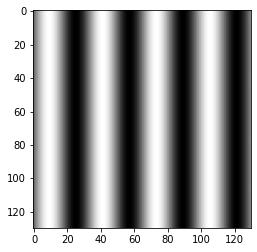

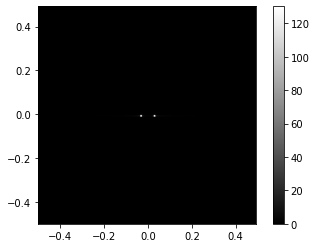

In [2]:
taille = 128
periode = 32
orientation = 0
amplitude = 128
val_moy = 0

#on appelle la fonction qui génère l'image
image = generation_sinus(taille,periode,orientation,amplitude,val_moy);

#on affiche l'image résultat
grey_map = plt.cm.gray 
plt.close("all")
plt.figure()
plt.imshow(image, grey_map)

#on calcule sa transformée de fourier 
spectre = np.fft.fft2(image) / (taille*taille)
spectre = np.fft.fftshift(spectre)

#pour avoir le spectre de raies et non les cn
spectre = 2*spectre
spectre[int(taille/2), int(taille/2)] = spectre[int(taille/2), int(taille/2)] / 2

#on affiche le module de la FFT
plt.figure()
plt.imshow(abs(spectre), grey_map, extent = [-0.5 , 0.5-1/taille, -0.5 , 0.5-1/taille])
plt.colorbar()


**Réponse :** ...

**ACTION :** Jouer sur la période en essayant les valeurs 16, 8 et 4 (orientation 0). Relever, pour ces différentes périodes, l’amplitude et la fréquence normalisées des raies. Jouer également sur l’amplitude et la valeur moyenne du signal 2-D. Commenter les résultats obtenus sur le spectre. Essayer ensuite la valeur 17 pour la période. Commenter le spectre obtenu à nouveau.

**Réponse :** ...

**ACTION :** On souhaite augmenter la résolution fréquentielle par zero-padding. Exécuter le script suivant. Faire varier maintenant l’orientation du signal 2-D : essayer par exemple pi/2, et pi/4. Commenter. 

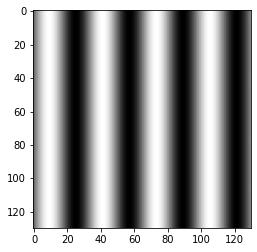

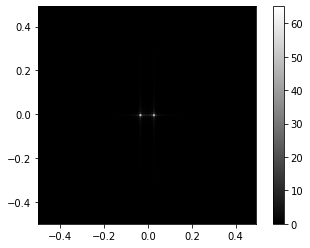

In [3]:
taille = 128
periode = 32
orientation = 0
amplitude = 128
val_moy = 0
   
image = generation_sinus(taille,periode,orientation,amplitude,val_moy)

#affichage de l'image
plt.close("all")
plt.figure()
plt.imshow(image, grey_map)


#on calcule sa transformée de fourier 
#on définit le nombre de points pour calculer la FFT2D sur une dimension
nb_point = 5*taille
spectre = np.fft.fft2(image, (nb_point,nb_point)) / (taille*taille)
spectre = np.fft.fftshift(spectre)

#on affiche le module de la FFT
plt.figure()
plt.imshow(abs(spectre), grey_map, extent = [-0.5 , 0.5-1/taille, -0.5 , 0.5-1/taille])
plt.colorbar()

**Réponse :** ...

In [4]:
""" définition d'une fonction permettant de générer des fonctions carrée et damier 2D"""

import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

def generation_carre(taille, periode, amplitude, val_moy) :
    #taille : taille de l'image à générer
    #periode : période en pixels
    #amplitude : amplitude de l'onde carrée
    #val_moy : valeur moyenne
      
    
    image = np.zeros((taille,taille))
    for i in range(int(periode/2)) :
        image[:,i:64:periode] = 1
                
    image = val_moy + amplitude*(image-0.5)
    
    return image
    
def generation_damier(taille,periode,amplitude,val_moy) :
    #taille : taille de l'image à générer
    #periode : période en pixels
    #orientation : orientation en radian
    #val_moy : valeur moyenne

    image1 = np.zeros((taille,taille))
    image2 = np.zeros((taille,taille))


    for i in range(0, int(periode/2)) :
        image1[:, i:64:periode] = 1
        image2[i:64:periode, :] = 1
  
    image = np.logical_xor(image1,image2)
    image = val_moy + amplitude*(image-0.5)
    
    return image

**ACTION :** Lancer les scripts suivants pour générer des signaux carré et damier. Jouer avec les paramètres et interpréter les résultats.

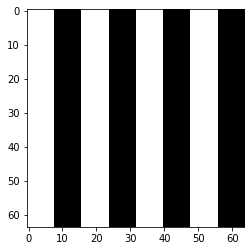

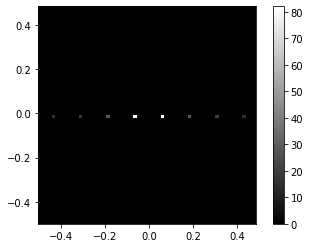

In [5]:
'''Génération d'un signal carré'''
taille = 64
periode = 16
amplitude = 128
val_moy = 0

#on appelle la fonction qui génère l'image
image = generation_carre(taille,periode,amplitude,val_moy)

#affichage de l'image
plt.close("all")
plt.figure()
plt.imshow(image, grey_map)

#on calcule sa transformée de fourier 
spectre = np.fft.fft2(image) / (taille*taille)
spectre = np.fft.fftshift(spectre)

#pour avoir le spectre de raies et non les cn
spectre = 2*spectre
spectre[int(taille/2), int(taille/2)] = spectre[int(taille/2), int(taille/2)] / 2

#on affiche le module de la FFT
plt.figure()
plt.imshow(abs(spectre), grey_map, extent = [-0.5 , 0.5-1/taille, -0.5 , 0.5-1/taille])
plt.colorbar()

**Analyse carré :** ...

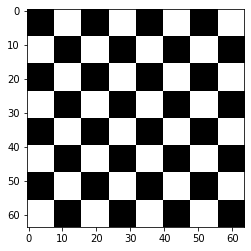

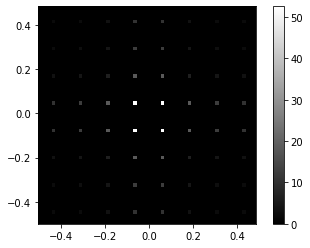

In [6]:
'''Génération d'un signal damier'''
taille = 64
periode = 16
amplitude = 128
val_moy = 0

#on appelle la fonction qui génère l'image
image = generation_damier(taille,periode,amplitude,val_moy)

#affichage de l'image
plt.close("all")
plt.figure()
plt.imshow(image, grey_map)

#on calcule sa transformée de fourier 
spectre = np.fft.fft2(image) / (taille*taille)
spectre = np.fft.fftshift(spectre)

#pour avoir le spectre de raies et non les cn
spectre = 2*spectre
spectre[int(taille/2), int(taille/2)] = spectre[int(taille/2), int(taille/2)] / 2

#on affiche le module de la FFT
plt.figure()
plt.imshow(abs(spectre), grey_map, extent = [-0.5 , 0.5-1/taille, -0.5 , 0.5-1/taille])
plt.colorbar()

**Analyse damier :** ...

**ACTION :** À partir des scripts précédents, écrire un script qui affiche une image naturelle  en niveaux de gris et son module de FFT2D. Le tester sur différentes images (vous pouvez utiliser les images fournies dans le dossier images.zip).

In [7]:
#TODO
   

## Filtrage linéaire dans le domaine fréquentiel et dans le domaine spatial

Dans cette partie, vous allez réaliser un filtrage linéaire sous Matlab de différentes manières. 

**ACTION :** Exécuter le script suivant qui permet de calculer et d'afficher la réponse impulsionnelle d'un filtre. Tester pour différentes valeurs de support.

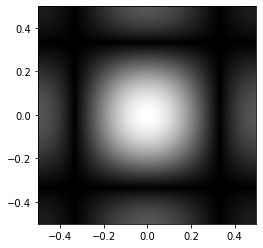

In [8]:
'''Définition de la réponse impulsionnelle d'un filtre'''

#on réalise un filtre 3x3 composé de 1
support = 3
filtre = np.ones((support,support)) / (support*support)

#calcul et affichage de la fonction de transfert
#on suppose que l'on filtre des images carrées de taille 512
taille = 512

#on calcule sa transformée de fourier (pas de padding)
spectre_filtre = np.fft.fftshift(np.fft.fft2(filtre,(taille,taille))) / (support*support)

#on affiche le module de la FFT
plt.close("all")
plt.figure()
plt.imshow(abs(spectre_filtre), grey_map, extent = [-0.5 , 0.5-1/taille, -0.5 , 0.5-1/taille])

    

**ACTION :** On réalise, dans la script suivant, le filtrage spatial d’une image en utilisant la fonction convolve2d de SciPy (bibliothèque de calcul scientifique) selon deux manières différentes. Comparer les deux images résultats et concluer (vous pouvez changer le support du filtre, dans ce cas il faut évidemment ré-exécuter le script précédent).

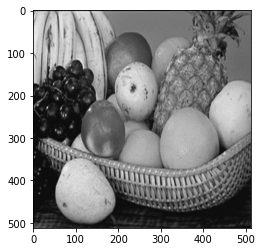

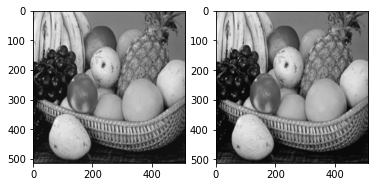

In [9]:
import scipy as sp
from scipy import signal

#lecture d'une image carré
image = plt.imread('FRUIT_LUMI.BMP')

#on affiche l'image
plt.figure()
plt.imshow(image, grey_map)

#filtrage en spatial
image_filtree = sp.signal.convolve2d(image,filtre)
image_filtree_2 = sp.signal.convolve2d(image,filtre,mode='same')

#affichage
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image_filtree, grey_map)
plt.subplot(1,2,2)
plt.imshow(image_filtree_2, grey_map)

**Réponse :**...

**ACTION :** On utilise dans le script ci-dessous, la fonction fftconvolve. Après avoir observé les effets du filtrage en spatial, observer le résultat en fréquentiel à l’aide de la dernière partie du script.

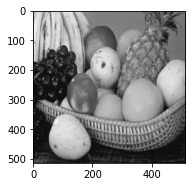

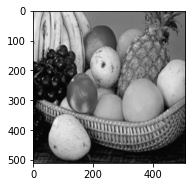

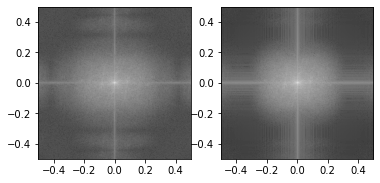

In [10]:
image_filtree_3 = sp.signal.fftconvolve(image, filtre)
image_filtree_4 = sp.signal.fftconvolve(image, filtre, mode='valid')

#affichage
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image_filtree_3, grey_map)
plt.figure()
plt.subplot(1,2,2)
plt.imshow(image_filtree_4, grey_map)


#observation du résultat en fréquentiel
#on calcule les transformées de fourier de l'image et de l'image filtrée 
spectre_image = np.fft.fftshift(np.fft.fft2(image)) / image.size
spectre_image_filtree_4 = np.fft.fftshift(np.fft.fft2(image_filtree_4)) / image.size

plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.log(abs(spectre_image)), grey_map, extent = [-0.5 , 0.5-1/taille, -0.5 , 0.5-1/taille])
plt.subplot(1,2,2)
plt.imshow(np.log(abs(spectre_image_filtree_4)), grey_map, extent = [-0.5 , 0.5-1/taille, -0.5 , 0.5-1/taille])

**ACTION :** En utilisant la fonction time.time() de la bibliothèque time de Python, comparer le temps d’exécution entre un filtrage spatial et un filtrage en fréquentiel. Jouer sur la taille des supports et concluer. Vérifier vos résultats avec les informations donnes dans la doc de scipy.

**Réponse :** ...

**ACTION :** Faire la même analyse avec le script suivant. Tester avec un autre filtre : ((-1,0,1),(-1,0,1),(-1,0,1)).

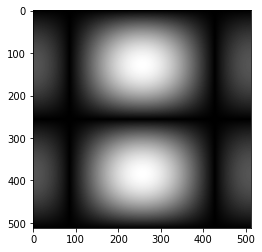

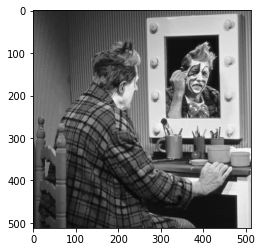

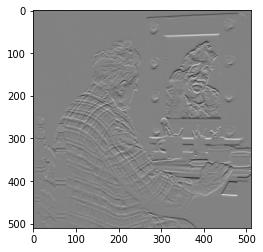

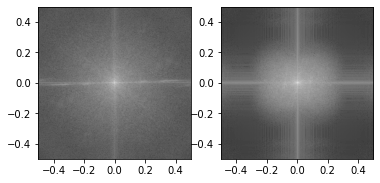

In [11]:
#on suppose que l'on filtre des images de taille 512
taille = 512;
#definition d'un filtre
filtre_ph = [[-1,-1,-1], [0,0,0], [1,1,1]]
support = 3
   
#on calcule sa transformée de fourier 
spectre_filtre_ph = np.fft.fftshift(np.fft.fft2(filtre_ph,(taille,taille))) / (support*support)
   
#on affiche le module de la FFT
plt.close("all") 
plt.figure()
plt.imshow(abs(spectre_filtre_ph), grey_map)

#lecture d'une image carré
image = plt.imread('CLOWN_LUMI.BMP')
  
#on affiche l'image
plt.figure()
plt.imshow(image,grey_map)

#filtrage en spatial
image_filtree_ph = sp.signal.fftconvolve(image, filtre_ph, mode='valid')

#affichage de l'image filtrée
plt.figure()
plt.imshow(image_filtree_ph, grey_map)

#affichage des
spectre_image = np.fft.fftshift(np.fft.fft2(image)) / image.size
spectre_image_filtree_ph = np.fft.fftshift(np.fft.fft2(image_filtree_ph)) / image.size

plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.log(abs(spectre_image)), grey_map, extent = [-0.5 , 0.5-1/taille, -0.5 , 0.5-1/taille])
plt.subplot(1,2,2)
plt.imshow(np.log(abs(spectre_image_filtree_4)), grey_map, extent = [-0.5 , 0.5-1/taille, -0.5 , 0.5-1/taille])



   

**Réponse :** ...

In [ ]:
w